# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

**En este proyecto, abordaremos el análisis de los factores que influyen en el precio de los vehículos. Nuestro objetivo es comprender las relaciones entre estas variables y su impacto en el valor de los automóviles. Para lograrlo, adoptaremos un enfoque sistemático y riguroso en el procesamiento y análisis de los datos.**

**Comenzaremos por explorar en detalle cada una de las columnas de nuestro conjunto de datos, identificando posibles valores faltantes y evaluando su importancia. Implementaremos estrategias adecuadas para tratar estos datos faltantes, ya sea mediante su imputación o, en casos extremos, su eliminación, con el fin de obtener un conjunto de datos completo y confiable.**

**Una vez que hayamos asegurado la calidad de nuestros datos, procederemos a corregir cualquier problema relacionado con la precisión o el formato incorrecto de la información. Mediante técnicas de limpieza y transformación, garantizaremos que los datos estén en el formato adecuado para su posterior análisis.**

**Con la base de datos preparada, nos adentraremos en el análisis exploratorio de los factores determinantes del precio de los vehículos. Utilizaremos diversas técnicas estadísticas y visualizaciones para descubrir patrones, tendencias y relaciones entre las variables. Al finalizar el proyecto, presentaremos nuestras conclusiones y los resultados obtenidos, brindando una visión integral de los factores que impactan en el precio de los vehículos estudiados.**

## Inicialización

In [2]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Cargar datos

In [3]:
# Carga el archivo de datos en un DataFrame
try:
    df = pd.read_csv('/datasets/vehicles_us.csv')
except:
    df = pd.read_csv('vehicles_us.csv')

df_natural = df.copy()

### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

[Al comprender los campos, explóralos para familiarizarte con los datos.]

In [4]:
# imprime la información general/resumida sobre el DataFrame
df.info()
print()
df.describe(include='all', datetime_is_numeric=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,51525,51525,46265.000000,51525,43633.000000,51525,51525,42258,25572.0,51525,51525.00000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,12,NaN,354,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17,NaN
freq,NaN,NaN,2796,24773,NaN,47288,NaN,46902,12405,10029,NaN,186,NaN
mean,12132.464920,2009.750470,NaN,NaN,6.125235,NaN,115553.461738,NaN,NaN,NaN,1.0,NaN,39.55476
std,10040.803015,6.282065,NaN,NaN,1.660360,NaN,65094.611341,NaN,NaN,NaN,0.0,NaN,28.20427
min,1.000000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,1.0,NaN,0.00000
25%,5000.000000,2006.000000,NaN,NaN,4.000000,NaN,70000.000000,NaN,NaN,NaN,1.0,NaN,19.00000
50%,9000.000000,2011.000000,NaN,NaN,6.000000,NaN,113000.000000,NaN,NaN,NaN,1.0,NaN,33.00000
75%,16839.000000,2014.000000,NaN,NaN,8.000000,NaN,155000.000000,NaN,NaN,NaN,1.0,NaN,53.00000


In [5]:
# imprimir una muestra de datos
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


**Basado en el análisis de los datos iniciales, se observa que existen varias columnas con valores faltantes, como 'is_4wd', 'paint_color', 'odometer', 'model_year' y 'cylinders'. Estos valores faltantes pueden abordarse de la siguiente manera:**

**Para la columna 'is_4wd', los valores faltantes corresponden a los casos en los que los vehículos no tienen tracción en las cuatro ruedas. Por lo tanto, podemos considerar imputar el valor 0 (no tiene tracción en las cuatro ruedas) en lugar de los valores faltantes.**

**La columna 'paint_color' presenta valores faltantes y no existe una solución rápida y fácil para llenarlos. Se requerirá un análisis más detallado de la distribución de colores y considerar diferentes enfoques, como la imputación basada en la moda o la clasificación de los vehículos en una categoría de color desconocido.**

**Para la columna 'odometer', podemos analizar la distribución estadística de los datos existentes y utilizar técnicas como la imputación basada en la media o la mediana para llenar los valores faltantes. Esto permitirá mantener la coherencia en los datos y evitar la pérdida de información.**

**Las columnas 'model_year' y 'cylinders' presentan aproximadamente un 10% de valores faltantes. Dado que es una cantidad considerable, se recomienda realizar un análisis más profundo para comprender la naturaleza de estos valores faltantes. Dependiendo de la disponibilidad de información adicional o técnicas de imputación adecuadas, se puede considerar llenar estos valores faltantes o tomar decisiones sobre su manejo.**

**Además de los datos faltantes, se identifica que la columna 'condition' contiene valores en formato de texto. Como parte de los objetivos del proyecto, se propone reemplazar estos valores con una codificación numérica o agregar una nueva columna llamada 'condition_id' para representar la condición de los vehículos de manera numérica. Este enfoque facilitará el análisis y la manipulación de los datos en futuras etapas del proyecto.**

**A medida que se avance en el análisis de los datos y se profundice en otras columnas, se evaluará la necesidad de abordar 
problemas similares y realizar los cambios pertinentes para garantizar la calidad y coherencia de los datos.**

## Tratar los valores ausentes (si hay)

### Columna is_4wd

In [6]:
#Corregimos la columna `is_4wd` para no tener datos vacíos en esta columna
df['is_4wd'] = df['is_4wd'].fillna(0)

### Columna cylinders

In [7]:
# Veamos la cantidad de autos por tipo de cilindro
df.groupby('cylinders')['model'].count()

cylinders
3.0        34
4.0     13864
5.0       272
6.0     15700
8.0     15844
10.0      549
12.0        2
Name: model, dtype: int64

In [21]:
cylinder_number = df.pivot_table(columns='model', values='cylinders', aggfunc=lambda x: x.mode().iat[0])
cylinder_number

model,acura tl,bmw x5,buick enclave,cadillac escalade,chevrolet camaro,chevrolet camaro lt coupe 2d,chevrolet colorado,chevrolet corvette,chevrolet cruze,chevrolet equinox,...,toyota camry le,toyota corolla,toyota highlander,toyota prius,toyota rav4,toyota sienna,toyota tacoma,toyota tundra,volkswagen jetta,volkswagen passat
cylinders,6.0,6.0,6.0,8.0,6.0,6.0,5.0,8.0,4.0,4.0,...,4.0,4.0,6.0,4.0,4.0,6.0,6.0,8.0,4.0,4.0


In [22]:
cylinder_number = df.groupby('model')['cylinders'].agg(pd.Series.mode).reset_index()
cylinder_number.columns = ['model', 'mode_cylinders']
print(cylinder_number)

                model  mode_cylinders
0            acura tl             6.0
1              bmw x5             6.0
2       buick enclave             6.0
3   cadillac escalade             8.0
4    chevrolet camaro             6.0
..                ...             ...
95      toyota sienna             6.0
96      toyota tacoma             6.0
97      toyota tundra             8.0
98   volkswagen jetta             4.0
99  volkswagen passat             4.0

[100 rows x 2 columns]


In [10]:
# Revisamos si funciona
cylinder_number['acura tl']['cylinders']

6.0

In [11]:
#Esta función se aplicará a cada fila
def cylinder_fill (row):
    model = row['model']
    try:
        return float(cylinder_number[model]['cylinders'])
    except:
        return np.nan

# Aplicamos al DataFrame y creamos una nueva columna, rellenaremos los espacios vacíos de la columna original para luego eliminar la
# columna que agregamos y finalmente comprobamos que ya no tengamos vacíos.
df['cylinders_new'] = df.apply(cylinder_fill, axis=1)
df['cylinders'] = df['cylinders'].fillna(df['cylinders_new'])
df = df.drop(['cylinders_new'], axis=1)
df['cylinders'].unique()

array([ 6.,  4.,  8.,  5., 10.,  3., 12.])

### Columna odometer

In [17]:
df['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [18]:
print('Porcentaje de autos nuevos: ')
print(len(df[df['odometer']==0])*100/len(df), '%')

Porcentaje de autos nuevos: 
0.35904900533721495 %


In [19]:
odometer_number = df.pivot_table(columns='condition', values = 'odometer', aggfunc='median')
odometer_number

condition,excellent,fair,good,like new,new,salvage
odometer,104230.0,181613.0,129000.0,72982.5,8002.0,142673.5


**Es razonable asumir que la cantidad de kilómetros recorridos por un vehículo puede estar relacionada con su condición general. Para abordar los datos faltantes en la columna 'condition', podemos utilizar una estrategia de imputación basada en la relación entre el kilometraje (columna 'odometer') y la condición del vehículo.**

In [20]:
print(len(df[df['odometer']==0].dropna(subset=['condition']))*100/len(df), '%')

0.35904900533721495 %


In [21]:
def odometer_fill (row):
    condition = row['condition']
    try:
        return float(odometer_number[condition]['odometer'])
    except:
        return np.nan

df['odometer_new'] = df.apply(odometer_fill, axis=1)
df['odometer'] = df['odometer'].fillna(df['odometer_new'])
df = df.drop(['odometer_new'], axis=1)
len(df[df['odometer'].isna()])

0

**Luego de realizar los mismos pasos que con la columna cylinders, podemos decir que ya no tenemos valores ausentes en la columna 'odometer'. Con esto finalizado podemos continuar con la siguiente columna.**

### Columna model_year

**Para esta columna haremos el mismo trabajo que hemos hecho en los casos anteriores. Si consideramos que el año del modelo (columna model_year) está relacionada con el modelo del auto (columna model), entonces al cruzar estos datos podremos empezar a llenar los datos faltantes.**

In [22]:
def get_mode(x):
    mode_value = x.mode()
    if len(mode_value) > 0:
        return mode_value.iloc[0]
    else:
        return np.nan

def model_year_fill(row):
    model = row['model']
    try:
        return round(model_year_table[model]['model_year'])
    except:
        return np.nan

model_year_table = df.pivot_table(columns='model', values='model_year', aggfunc=get_mode)

df['model_year_new'] = df.apply(model_year_fill, axis=1)
df['model_year'] = df['model_year'].fillna(df['model_year_new'])
df = df.drop(['model_year_new'], axis=1)

len(df[df['model_year'].isnull()])

0

### Columna paint_color

In [23]:
df.groupby('paint_color')['model'].count()

paint_color
black      7692
blue       4475
brown      1223
custom     1153
green      1396
grey       5037
orange      231
purple      102
red        4421
silver     6244
white     10029
yellow      255
Name: model, dtype: int64

In [24]:
df['paint_color'] = df['paint_color'].fillna('unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


**A veces, es importante reconocer y aceptar que algunos datos en una columna no se pueden rellenar. En el caso de la columna 'paint_color', intentar imputar los valores faltantes mediante suposiciones o adivinanzas podría comprometer la integridad de nuestro DataFrame y disminuir la confianza en los datos. Por lo tanto, es recomendable mantener los valores faltantes en esta columna y seguir adelante con el análisis de los datos disponibles.**

**Por otro lado, al haber completado exitosamente la tarea de manejar los valores faltantes en el DataFrame, hemos concluido la primera etapa de nuestro proyecto. Ahora podemos proceder a revisar y corregir otros aspectos de los datos en el siguiente paso de nuestro análisis.**

### Estado del Dataframe luego del trabajo con valores ausentes

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


## Corregir los tipos de datos

### Columna condition

In [26]:
df.groupby('condition')['model'].count()

condition
excellent    24773
fair          1607
good         20145
like new      4742
new            143
salvage        115
Name: model, dtype: int64

In [27]:
def condition_id_fill (row):
    if row['condition'] == 'new':
        return 5
    if row['condition'] == 'like new':
        return 4
    if row['condition'] == 'excellent':
        return 3
    if row['condition'] == 'good':
        return 2
    if row['condition'] == 'fair':
        return 1
    if row['condition'] == 'salvage':
        return 0

df['condition_id'] = df.apply(condition_id_fill, axis=1)
len(df['condition_id'])

51525

In [28]:
df.groupby('condition_id')['model'].count()

condition_id
0      115
1     1607
2    20145
3    24773
4     4742
5      143
Name: model, dtype: int64

- **Al agrupar los datos por la columna 'condition' y contar la cantidad de modelos en cada categoría, podemos observar la distribución de las condiciones de los vehículos en el conjunto de datos. Las condiciones más comunes son 'excellent', 'good' y 'fair', mientras que las menos comunes son 'like new', 'new' y 'salvage'.**
- **Se ha creado una nueva columna llamada 'condition_id' utilizando la función 'condition_id_fill' que asigna un valor numérico a cada condición. Esto permite representar la condición de manera más conveniente y manipulable en análisis posteriores.**
- **Después de aplicar la función 'condition_id_fill' a cada fila del DataFrame, se ha verificado que la columna 'condition_id' tiene la misma cantidad de registros que el DataFrame original (51525 registros). Esto indica que no se han perdido filas durante el proceso de asignación de valores a 'condition_id'.**
- **Al agrupar los datos por la columna 'condition_id' y contar la cantidad de modelos en cada categoría numérica, podemos observar la distribución de las condiciones codificadas en el conjunto de datos. Las categorías más comunes son 2 (correspondiente a 'good') y 3 (correspondiente a 'excellent'), mientras que las menos comunes son 0 (correspondiente a 'salvage') y 5 (correspondiente a 'new').**

### Columnas cylinders y model_year

In [29]:
def int_converter (value):
    return int(value)

df['cylinders'] = df['cylinders'].astype(int)
df['model_year'] = df['model_year'].astype(int)

- **Se ha aplicado la función 'int_converter' a la columna 'cylinders' para convertir los valores de tipo float a tipo int. Esto permite representar la cantidad de cilindros de los vehículos como números enteros.**
- **Del mismo modo, se ha aplicado la función 'int_converter' a la columna 'model_year' para convertir los valores de tipo float a tipo int. Esto permite representar el año del modelo de los vehículos como números enteros.**

### Columna is_4wd

In [30]:
def bool_converter (value):
    if value==1:
        return True
    else:
        return False

df['is_4wd'] = df['is_4wd'].apply(bool_converter)
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  condition_id  51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 5.2+ MB


- **Se ha verificado que no hay valores nulos en ninguna de las columnas, ya que todas tienen una cuenta no nula de 51,525, lo que asegura que no se haya perdido información durante el proceso de transformación.**
- **Se ha realizado una conversión exitosa de los tipos de datos en varias columnas del DataFrame. Las columnas 'model_year' y 'cylinders' han sido convertidas de tipo float a tipo int, lo cual es más apropiado para representar el año del modelo y la cantidad de cilindros de los vehículos.**

## Enriquecer datos

In [31]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio
df['weekday'] = df['date_posted'].dt.weekday
df['month'] = df['date_posted'].dt.month
df['year'] = df['date_posted'].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  condition_id  51525 non-null  int64         
 14  weekday       51525 non-null  int64         
 15  month         51525 non-null  int64 

In [32]:
# Agrega los años del vehículo cuando el anuncio se colocó
df['car_age'] = df['year'] - df['model_year'] + 1
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_id,weekday,month,year,car_age
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,2,5,6,2018,8
1,25500,2013,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2,4,10,2018,6
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,4,3,2,2019,7
3,1500,2003,ford f-150,fair,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9,1,4,3,2019,17
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,3,1,4,2019,3


In [33]:
# Agrega el millaje promedio del vehículo por año
df['km_avg'] = df['odometer'] / df['car_age']
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_id,weekday,month,year,car_age,km_avg
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,2,5,6,2018,8,18125.000000
1,25500,2013,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2,4,10,2018,6,14784.166667
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,4,3,2,2019,7,15714.285714
3,1500,2003,ford f-150,fair,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9,1,4,3,2019,17,10683.117647
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,3,1,4,2019,3,26967.666667


In [34]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente
condition_mapping = {'new': 'nuevo', 'like new': 'como nuevo', 'excellent': 'excelente', 'good': 'bien', 'fair': 'bastante', 'salvage': 'para rescate'}
df['condition'] = df['condition'].map(condition_mapping)
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_id,weekday,month,year,car_age,km_avg
0,9400,2011,bmw x5,bien,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,2,5,6,2018,8,18125.000000
1,25500,2013,ford f-150,bien,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2,4,10,2018,6,14784.166667
2,5500,2013,hyundai sonata,como nuevo,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,4,3,2,2019,7,15714.285714
3,1500,2003,ford f-150,bastante,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9,1,4,3,2019,17,10683.117647
4,14900,2017,chrysler 200,excelente,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,3,1,4,2019,3,26967.666667
5,14990,2014,chrysler 300,excelente,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,3,2,6,2018,5,11590.800000
6,12990,2015,toyota camry,excelente,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,3,3,12,2018,4,19803.000000
7,15990,2013,honda pilot,excelente,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,3,0,1,2019,7,15639.000000
8,11500,2012,kia sorento,excelente,4,gas,104174.0,automatic,SUV,unknown,True,2018-07-16,19,3,0,7,2018,7,14882.000000
9,9200,2008,honda pilot,excelente,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,3,4,2,2019,12,12265.916667


**La columna 'condition' ha sido modificada utilizando un mapeo de valores para reemplazar los términos originales por términos más manipulables. Ahora, la condición se presenta en las categorías 'nuevo', 'como nuevo', 'excelente', 'bien', 'bastante' y 'para rescate'.**

**Al observar los primeros 10 registros del DataFrame actualizado, podemos ver cómo la columna 'condition' refleja ahora estas nuevas categorías de condición de manera más comprensible.**

## Comprobar datos limpios

In [35]:
# imprime la información general/resumida sobre el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  condition_id  51525 non-null  int64         
 14  weekday       51525 non-null  int64         
 15  month         51525 non-null  int64 

In [36]:
# imprimir una muestra de datos
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_id,weekday,month,year,car_age,km_avg
0,9400,2011,bmw x5,bien,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,2,5,6,2018,8,18125.000000
1,25500,2013,ford f-150,bien,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2,4,10,2018,6,14784.166667
2,5500,2013,hyundai sonata,como nuevo,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,4,3,2,2019,7,15714.285714
3,1500,2003,ford f-150,bastante,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9,1,4,3,2019,17,10683.117647
4,14900,2017,chrysler 200,excelente,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,3,1,4,2019,3,26967.666667
5,14990,2014,chrysler 300,excelente,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,3,2,6,2018,5,11590.800000
6,12990,2015,toyota camry,excelente,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,3,3,12,2018,4,19803.000000
7,15990,2013,honda pilot,excelente,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,3,0,1,2019,7,15639.000000
8,11500,2012,kia sorento,excelente,4,gas,104174.0,automatic,SUV,unknown,True,2018-07-16,19,3,0,7,2018,7,14882.000000
9,9200,2008,honda pilot,excelente,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,3,4,2,2019,12,12265.916667


## Estudiar parámetros principales

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

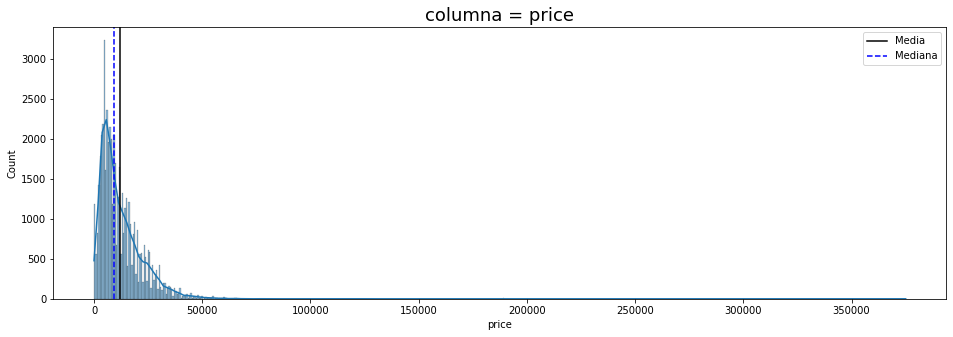

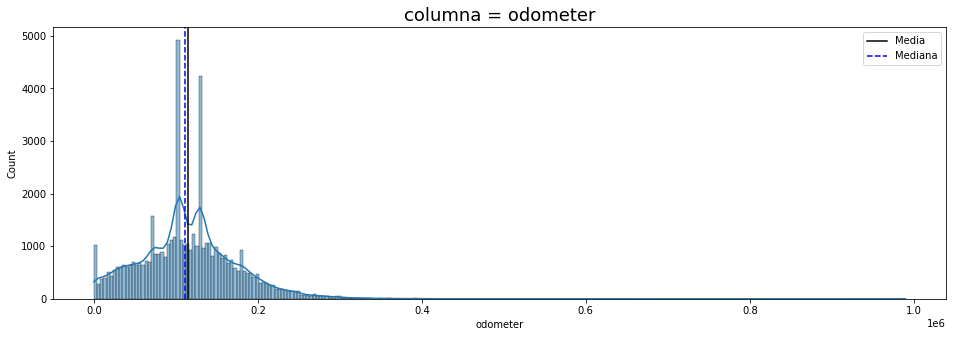

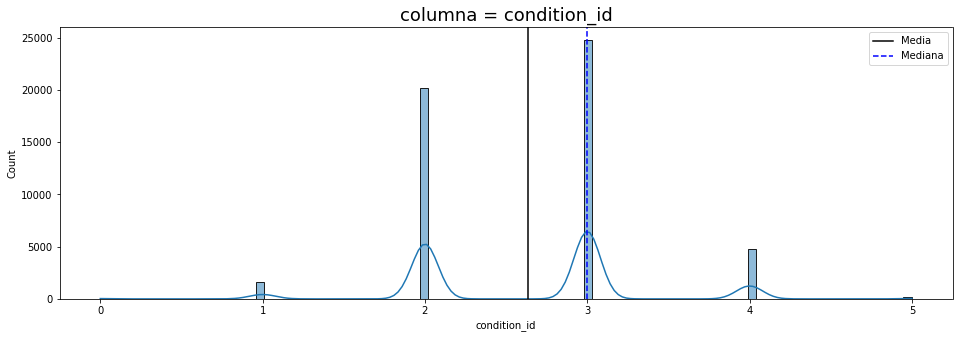

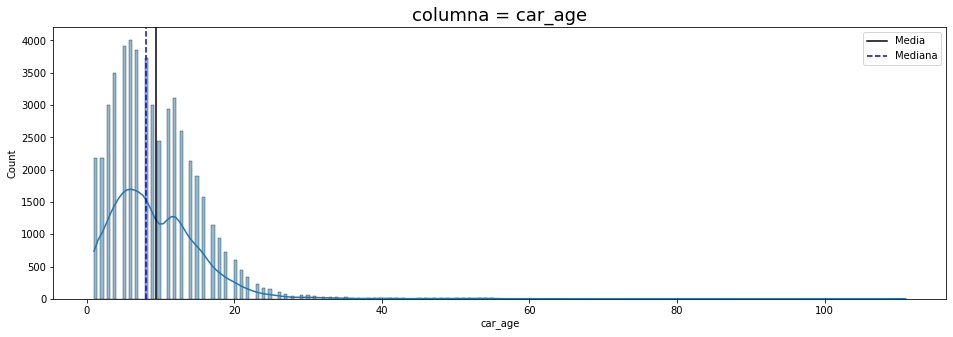

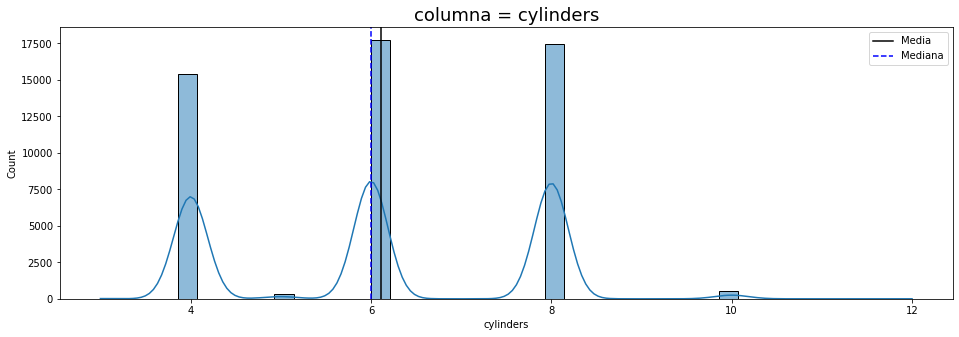

In [37]:
cols = ['price', 'odometer', 'condition_id', 'car_age', 'cylinders']
for col in cols:
    plt.figure(figsize=(16, 5))
    sns.histplot(data=df, x=col, kde=True).set_title(f'columna = {col}', fontsize=18)
    plt.axvline(x=df[col].mean(), c='k', ls='-', lw=1.5, label='Media')
    plt.axvline(x=df[col].median(), c='blue', ls='--', lw=1.5, label='Mediana')
    plt.legend()
    plt.show()

In [38]:
df.groupby(['car_age','cylinders']).size().reset_index(name='count')

,car_age,cylinders,count
0,1,3,5
1,1,4,562
2,1,5,4
3,1,6,856
4,1,8,670
...,...,...,...
206,70,8,1
207,72,8,1
208,83,6,1
209,90,8,1


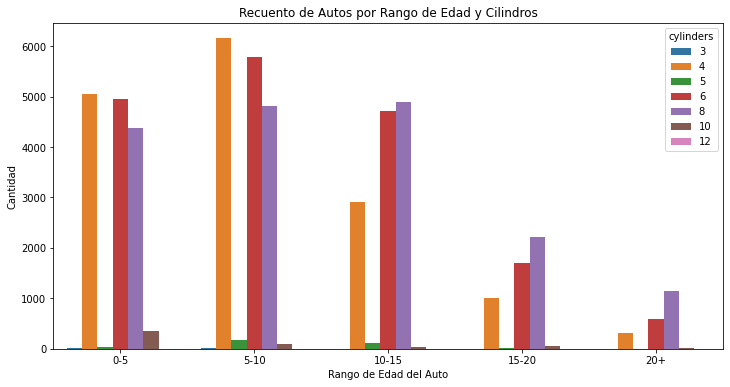

In [39]:
age_bins = [0, 5, 10, 15, 20, np.inf]
age_labels = ['0-5', '5-10', '10-15', '15-20', '20+']

df['age_group'] = pd.cut(df['car_age'], bins=age_bins, labels=age_labels)
age_cylinders_counts = df.groupby(['age_group', 'cylinders']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=age_cylinders_counts, x='age_group', y='count', hue='cylinders')
plt.xlabel('Rango de Edad del Auto')
plt.ylabel('Cantidad')
plt.title('Recuento de Autos por Rango de Edad y Cilindros')

plt.show()

**Viendo los histogramas y los gráficos, podemos llegar a concluir que tenemos varios valores atípicos en las columnas price, odometer y car_age. Analizaremos como se distribuye cada una de estas columnas internamente en la siguiente sección de este proyecto.**

## Estudiar y tratar valores atípicos

In [40]:
def calculate_outlier_limits(data, column, lower_quantile=0.25, upper_quantile=0.75):
    lower_limit = data[column].quantile(lower_quantile)
    upper_limit = data[column].quantile(upper_quantile)
    return lower_limit, upper_limit

# Determinar los límites inferiores y superiores para valores atípicos
price_lower_limit, price_upper_limit = calculate_outlier_limits(df, 'price')
odometer_lower_limit, odometer_upper_limit = calculate_outlier_limits(df, 'odometer')
age_lower_limit, age_upper_limit = calculate_outlier_limits(df, 'car_age')

print('Precio mínimo:', price_lower_limit)
print('Precio máximo:', price_upper_limit)
print('Odómetro mínimo:', odometer_lower_limit)
print('Odómetro máximo:', odometer_upper_limit)
print('Edad mínima:', age_lower_limit)
print('Edad máxima:', age_upper_limit)

Precio mínimo: 5000.0
Precio máximo: 16839.0
Odómetro mínimo: 75668.0
Odómetro máximo: 147821.0
Edad mínima: 5.0
Edad máxima: 13.0


In [41]:
# Almacena los datos sin valores atípicos en un DataFrame separado
def filter_data(df, price_lower_limit, odometer_lower_limit, age_lower_limit):
    price_filtered = df['price'] >= price_lower_limit
    odometer_filtered = df['odometer'] >= odometer_lower_limit
    age_filtered = df['car_age'] >= age_lower_limit

    return df[price_filtered & odometer_filtered & age_filtered]

df_filtered = filter_data(df, price_lower_limit, odometer_lower_limit, age_lower_limit)

# Mostrar información del DataFrame filtrado
print('Forma del DataFrame filtrado:', df_filtered.shape)
print()
print('Primeras filas del DataFrame filtrado:')
display(df_filtered.head())

Forma del DataFrame filtrado: (23781, 20)

Primeras filas del DataFrame filtrado:


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_id,weekday,month,year,car_age,km_avg,age_group
0,9400,2011,bmw x5,bien,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,2,5,6,2018,8,18125.000000,5-10
1,25500,2013,ford f-150,bien,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2,4,10,2018,6,14784.166667,5-10
2,5500,2013,hyundai sonata,como nuevo,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,4,3,2,2019,7,15714.285714,5-10
7,15990,2013,honda pilot,excelente,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,3,0,1,2019,7,15639.000000,5-10
8,11500,2012,kia sorento,excelente,4,gas,104174.0,automatic,SUV,unknown,True,2018-07-16,19,3,0,7,2018,7,14882.000000,5-10


### Variable precio atípico

In [42]:
def iqr_finder (data, column):
    return data[column].quantile(0.75) + (data[column].quantile(0.75) - data[column].quantile(0.25))*1.5

def iqr_limit (data, column):
    iqr = iqr_finder(data, column)
    data_set = data[column]
    data_set = data_set[data_set<=iqr]
    return data_set

def iqr_off_limit (data, column):
    iqr = iqr_finder(data, column)
    data_set = data[column]
    data_set = data_set[data_set>iqr]
    return data_set

# Dividiremos el Dataframe en 2, según estén dentro o fuera del bigote superior

df_price_in = iqr_limit(df, 'price') # IN the bracket
df_price_out = iqr_off_limit(df, 'price') # OUT the bracket
df_odometer_in = iqr_limit(df, 'odometer') # IN the bracket
df_odometer_out = iqr_off_limit(df, 'odometer') # OUT the bracket
df_age_in = iqr_limit(df, 'car_age') # IN the bracket
df_age_out = iqr_off_limit(df, 'car_age') # OUT the bracket
df_cylinders_in = df[(df['cylinders'] == 4) | (df['cylinders'] == 6) | (df['cylinders'] == 8)]['cylinders'] # IN the bracket # IN the bracket
df_cylinders_out = df[(df['cylinders'] != 4) & (df['cylinders'] != 6) & (df['cylinders'] != 8)]['cylinders'] # OUT the bracket
df_condition_in = df[(df['condition_id'] == 2) | (df['condition_id'] == 3) | (df['condition_id'] == 4)]['condition_id'] # IN the bracket
df_condition_out = df[(df['condition_id'] != 2) & (df['condition_id'] != 3) & (df['condition_id'] != 4)]['condition_id'] # OUT the bracket

<AxesSubplot:>

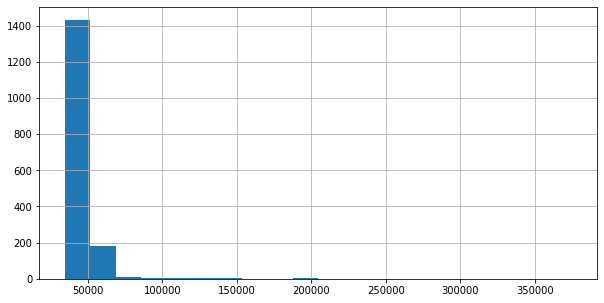

In [43]:
df_price_out.hist(bins=20, figsize=(10,5))

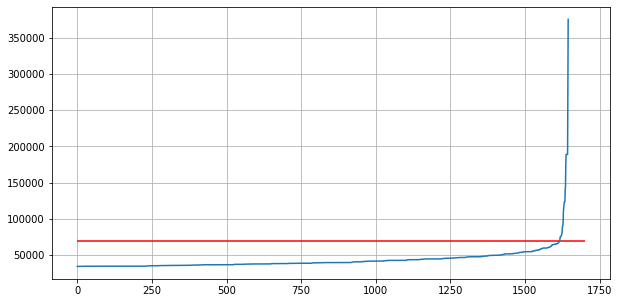

In [44]:
df_price_out.sort_values().reset_index(drop=True).plot(figsize=(10,5), grid=True)
plt.hlines(y=70000, color='red', xmin=0, xmax=1700)

In [45]:
df_price_out.describe()

count      1646.000000
mean      43554.006075
std       17013.005743
min       34599.000000
25%       36616.250000
50%       39777.000000
75%       45873.250000
max      375000.000000
Name: price, dtype: float64

In [46]:
len(df_price_out[df_price_out>=70000])

29

**Durante el análisis de la columna de precios, se observa un patrón interesante en relación con los valores atípicos. Estos valores inusuales aumentan gradualmente hasta alcanzar un umbral alrededor de 70000, momento a partir del cual los precios se disparan rápidamente y llegan a alcanzar valores máximos de hasta 375000.**

**Considerando esta observación, surge la posibilidad de realizar un análisis segmentado de la columna de precios, dividiendo los datos en dos rangos: aquellos por debajo de 70000 y aquellos por encima. Sin embargo, es importante tener en cuenta que el número de datos disponibles en el rango superior puede ser limitado, lo que dificulta la obtención de conclusiones significativas para este segmento específico.**

### Variable odómetro atípico

<AxesSubplot:>

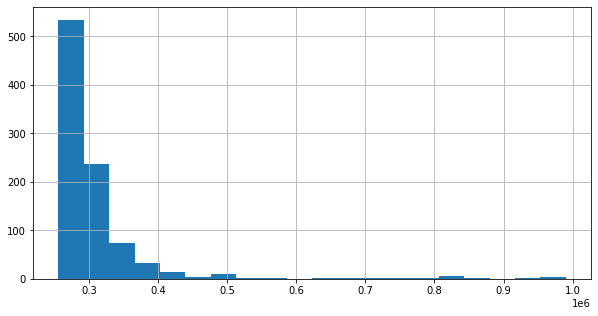

In [47]:
df_odometer_out.hist(bins=20, figsize=(10,5))

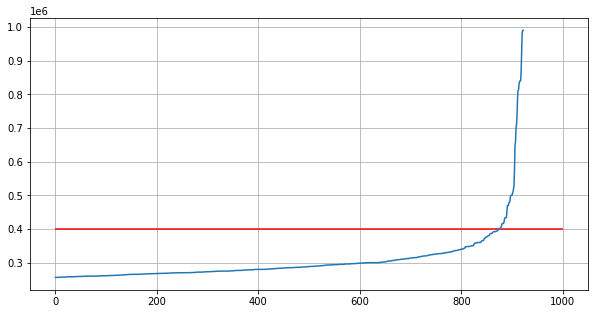

In [48]:
df_odometer_out.sort_values().reset_index(drop=True).plot(figsize=(10,5), grid=True)
plt.hlines(y=400000, color='red', xmin=0, xmax=1000)

In [49]:
df_odometer_out.describe()

count       923.000000
mean     306962.284940
std       83991.956967
min      256124.000000
25%      269659.000000
50%      285000.000000
75%      312000.000000
max      990000.000000
Name: odometer, dtype: float64

In [50]:
len(df_odometer_out[df_odometer_out>=400000])

48

**Durante el análisis de esta variable, se observa un patrón similar al de la variable anterior, donde se presenta un aumento gradual seguido de un crecimiento acelerado. Sin embargo, en este caso, el valor crítico en el que se produce este cambio brusco es de 400000 (4 * 10^5).**

**Este hallazgo indica la presencia de una tendencia específica en los datos, donde los valores tienden a incrementarse de manera constante hasta alcanzar el umbral mencionado, a partir del cual experimentan un incremento significativo y rápido. Este punto de inflexión puede ser de relevancia en el análisis posterior, ya que representa un cambio notable en la distribución de los datos.**

### Variable edad del auto atípico

<AxesSubplot:>

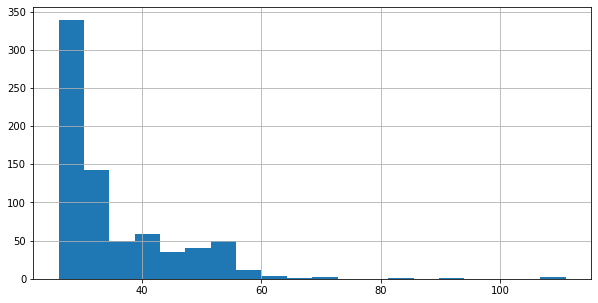

In [51]:
df_age_out.hist(bins=20, figsize=(10,5))

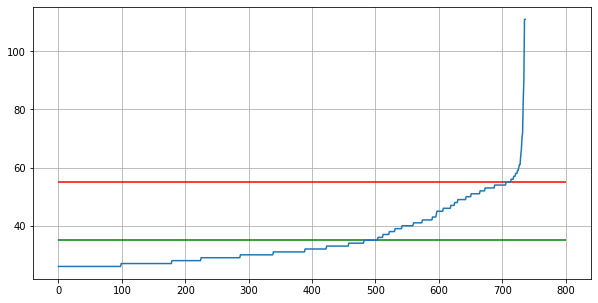

In [52]:
df_age_out.sort_values().reset_index(drop=True).plot(figsize=(10,5), grid=True)
plt.hlines(y=55, color='red', xmin=0, xmax=800)
plt.hlines(y=35, color='green', xmin=0, xmax=800)

In [53]:
df_age_out.describe()

count    737.000000
mean      35.128901
std       10.481788
min       26.000000
25%       28.000000
50%       31.000000
75%       40.000000
max      111.000000
Name: car_age, dtype: float64

In [54]:
len(df_age_out[df_age_out>=55])

31

**En este caso, podemos identificar 3 rangos en los que los datos se comportan de manera diferente. El primero de estos rangos, con el aumento más lento, se encuentra entre los 26 y 35 años. Luego un aumento más rápido entre los 35 y 55 años.**

**El rango final se encuentra entre los 55 y 111 años. Como en los casos anteriores, tenemos un aumento extremadamente rápido en este último rango de edad.**

### Variable cilindros atípico

<AxesSubplot:>

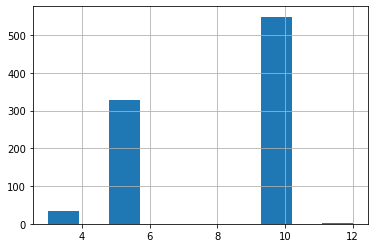

In [55]:
df_cylinders_out.hist()

In [56]:
df_cylinders_out.value_counts()

10    549
5     328
3      34
12      2
Name: cylinders, dtype: int64

**Entre los vehículos con un número atípico de cilindros, los que tienen 10 cilindros son los más comunes. Se podría preguntar al departamente de mecánica si esta es una modificación común o se trata de algún tipo de motor especial.**

### Variable condición atípico

<AxesSubplot:>

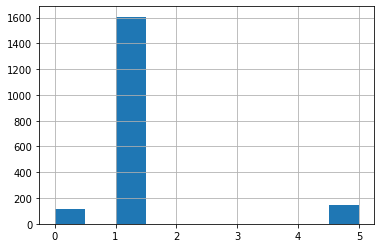

In [57]:
df_condition_out.hist()

In [58]:
df_condition_out.value_counts()

1    1607
5     143
0     115
Name: condition_id, dtype: int64

**Dentro de las condiciones anormales, la más común es el estado razonable (fair). Esta concentra casi todos los vehículos en condiciones atípicas.**

**Como podíamos esperar luego de realizar los análisis anteriores, existe una pequeña cantidad de autos nuevos y otra en condición de salvataje. Esto tiene lógica con algunos segmentos en el análisis de los valores dentro de los rangos normales.**

## Estudiar parámetros principales sin valores atípicos

**Ahora que tenemos las herramientas necesarias, estudiemos los datos de cada columna. El objetivo de esta sección es encontrar y describir el comportamiento y distribución de los datos. Esto se hará de manera independiente para cada columna, su correlación será el objetivo de una sección siguiente.**

### Diagramas de caja

<AxesSubplot:>

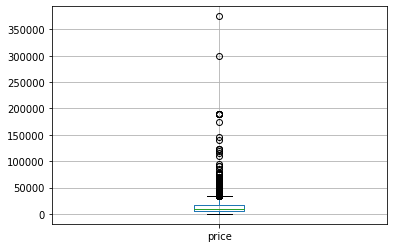

In [60]:
df.boxplot(column='price')

<AxesSubplot:>

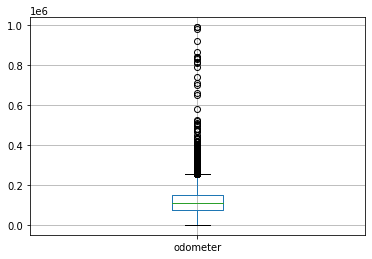

In [61]:
df.boxplot(column='odometer')

<AxesSubplot:>

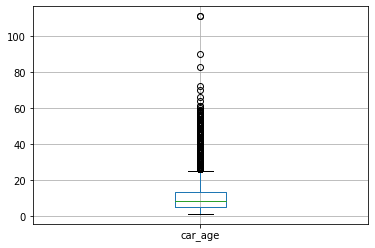

In [62]:
df.boxplot(column='car_age')

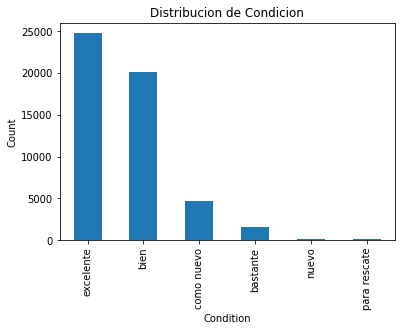

In [63]:
df['condition'].value_counts().plot(kind='bar')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Distribucion de Condicion')
plt.show()

### Variable precio

<AxesSubplot:>

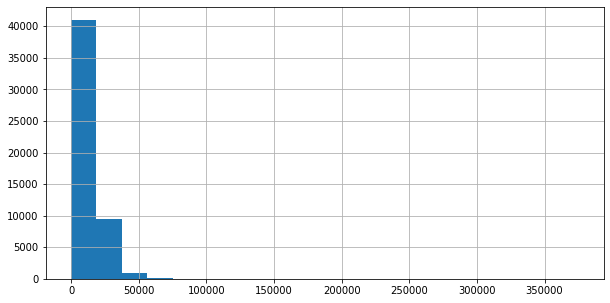

In [64]:
#Distribución de valores
df['price'].hist(bins=20, figsize=(10,5))

<AxesSubplot:>

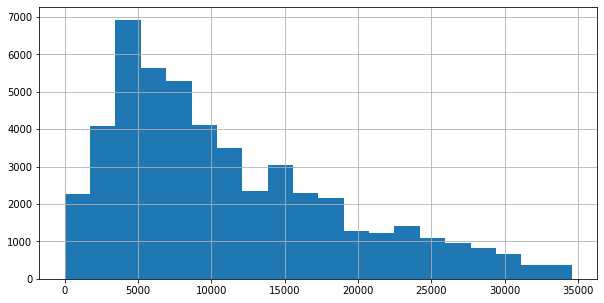

In [65]:
# Dividiremos el Dataframe en 2, según estén dentro o fuera del bigote superior
df_price_in = iqr_limit(df, 'price') # IN the bracket
df_price_out = iqr_off_limit(df, 'price') # OUT the bracket
df_price_in.hist(bins=20, figsize=(10,5))

<AxesSubplot:>

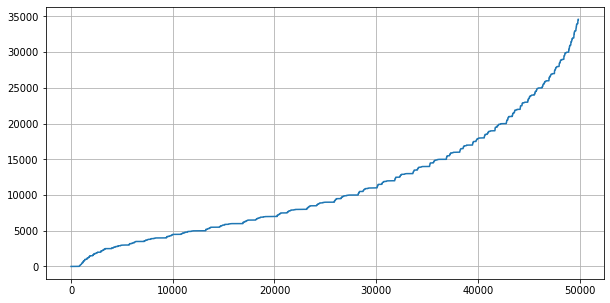

In [66]:
df_price_in.sort_values().reset_index(drop=True).plot(figsize=(10,5), grid=True)

In [67]:
df_price_in.describe()

count    49879.000000
mean     11095.558472
std       7806.520888
min          1.000000
25%       4995.000000
50%       8990.000000
75%      15900.000000
max      34595.000000
Name: price, dtype: float64

**Centrandonos en los bajores bajo el bigote superior, los cuales podemos considerar los datos típicos al encontrarse dentro de rangos esperables para una muestra. Estos parecen tener una distribución asimétrica centrada en los 5000, con un cuarto de los datos entre 4995 y 8990. Siendo este el rango con mayor densidad.**

**El precio máximo normal para un auto es de 34595, recomendando redondear a 35000 para publicidad. Mientras que el mínimo se encuentra en 0. Se espera que sean autos en condición de salvataje y se estén regalando.**

### Variable Odómetro

<AxesSubplot:>

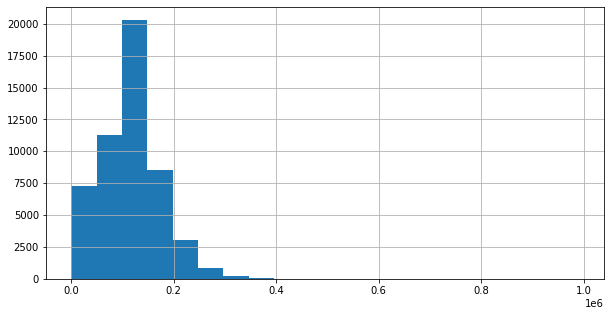

In [68]:
# Distribución de valores
df['odometer'].hist(bins=20, figsize=(10,5))

<AxesSubplot:>

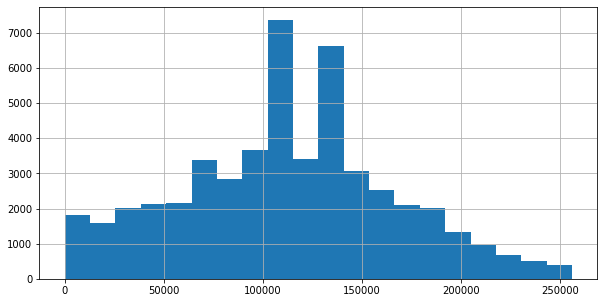

In [69]:
# Datos distribuidos bajo el bigote superior
df_odometer_in = iqr_limit(df, 'odometer') # IN the bracket
df_odometer_out = iqr_off_limit(df, 'odometer') # OUT the bracket
df_odometer_in.hist(bins=20, figsize=(10,5))

In [70]:
df_odometer_in.value_counts().head(10)

104230.0    3803
129000.0    3199
72982.5      728
181613.0     237
0.0          185
140000.0     183
120000.0     179
130000.0     178
160000.0     167
200000.0     166
Name: odometer, dtype: int64

<AxesSubplot:>

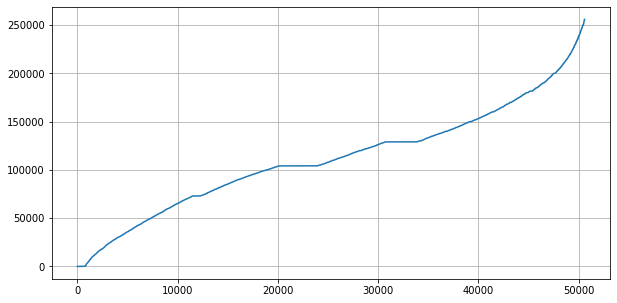

In [71]:
df_odometer_in.sort_values().reset_index(drop=True).plot(figsize=(10,5), grid=True)

In [72]:
df_odometer_in.describe()

count     50602.000000
mean     111701.178481
std       53977.805739
min           0.000000
25%       74502.000000
50%      109012.500000
75%      144554.000000
max      256000.000000
Name: odometer, dtype: float64

**En esta columna, tenemos una curiosidad estadística. Dentro de los valores normales, tenemos 2 valores que son de 4 a 5 veces más comunes que los siguientes valores que los siguen. Estos valores son 106688 y 129920, encontrandose entre ellos el segmento de mayor densidad.**

**El máximo se encuentra en 251000 y el mínimo en 0. Esta vez, probablemente, se trate de autos nuevos y no de los autos en ruinas.**

### Variable edad del auto

<AxesSubplot:>

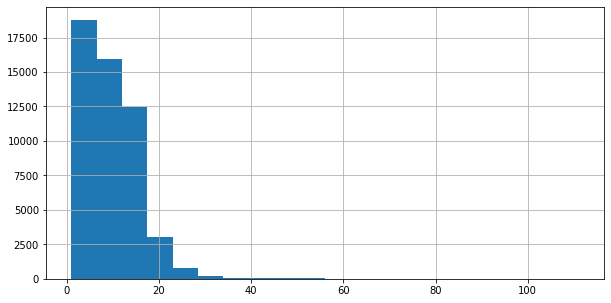

In [73]:
# Distribución de valores
df['car_age'].hist(bins=20, figsize=(10,5))

<AxesSubplot:>

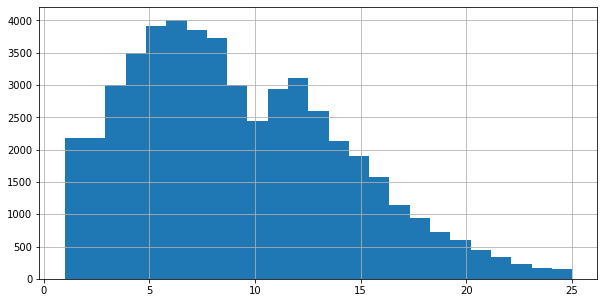

In [74]:
# El Dataframe se divide en 2, según estén dentro o fuera del bigote superior
df_age_in = iqr_limit(df, 'car_age') # IN the bracket
df_age_out = iqr_off_limit(df, 'car_age') # OUT the bracket
# Distribución de los datos bajo el bigote superior
df_age_in.hist(bins=25, figsize=(10,5))

<AxesSubplot:>

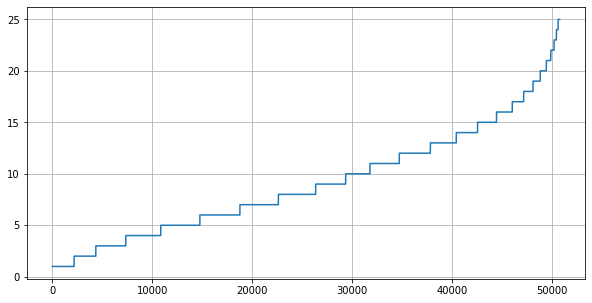

In [75]:
df_age_in.sort_values().reset_index(drop=True).plot(figsize=(10,5), grid=True)

In [76]:
df_age_in.describe()

count    50788.000000
mean         9.063598
std          5.212224
min          1.000000
25%          5.000000
50%          8.000000
75%         13.000000
max         25.000000
Name: car_age, dtype: float64

**Aunque la distribución de esta columna no es simétrica, si está parejamente distribuida. Tenemos lo cuartiles 1 y 3 a la misma distancia de la mediana. Los valores mayores a 13, cuartil 3, aparecen cada uno con poca frecuencia. Los valores más comunes se encuentran entre 4, cuartil 1, y 13. Concentrandose en 9, que resulta ser el valor más común, la mediana y, por menos de 0.2, también la media. Esta cantidad debería ser recordada y considerada en los análisis siguientes.**

**Tenemos un máximo normal de 25 años y un mínimo, nuevamente, de 1 por los autos 0 km.**

### Variable cilindros

<AxesSubplot:>

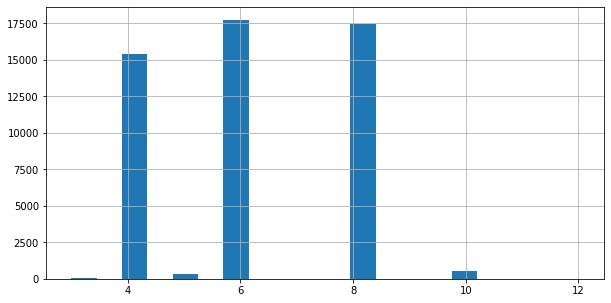

In [77]:
# Distribución de valores
df['cylinders'].hist(bins=20, figsize=(10,5))

In [78]:
df['cylinders'].value_counts()

6     17736
8     17459
4     15417
10      549
5       328
3        34
12        2
Name: cylinders, dtype: int64

In [79]:
# El DataFrame se separa en 2, uno según el número de cilindros más típicos y el otro los demás.
df_cylinders_in = df[(df['cylinders'] == 4) | (df['cylinders'] == 6) | (df['cylinders'] == 8)]['cylinders']
df_cylinders_out = df[(df['cylinders'] != 4) & (df['cylinders'] != 6) & (df['cylinders'] != 8)]['cylinders']

In [80]:
# Porcentaje de los cilindros típicos entre el total de anuncios. 
print('Porcentaje:', len(df_cylinders_in)*100/len(df), '%')

Porcentaje: 98.22804463852499 %


In [81]:
df_cylinders_in.value_counts(normalize=True)

6    0.350431
8    0.344958
4    0.304612
Name: cylinders, dtype: float64

**Tenemos 3 cantidades de cilindros que son extremadamente comunes, siendo más del 98% de los anuncios totales. Estos son los vehículos con 4, 6 y 8 cilindros. Entre ellos se encuentran distribuidos en aproximadamente las mismas cantidades, con una ligera preferencia por los 8 cilindros.**

### Variable condición

<AxesSubplot:>

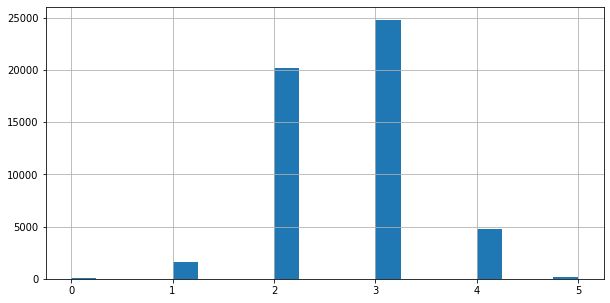

In [82]:
# Distribución de valores
df['condition_id'].hist(bins=20, figsize=(10,5))

In [83]:
df['condition_id'].value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition_id, dtype: int64

In [84]:
df['condition_id'].value_counts(normalize=True)

3    0.480796
2    0.390975
4    0.092033
1    0.031189
5    0.002775
0    0.002232
Name: condition_id, dtype: float64

In [85]:
# Separemos el Dataframe en 2, según las 3 condiciones más comunes y el resto
df_condition_in = df[(df['condition_id'] == 2) | (df['condition_id'] == 3) | (df['condition_id'] == 4)]['condition_id']
df_condition_out = df[(df['condition_id'] != 2) & (df['condition_id'] != 3) & (df['condition_id'] != 4)]['condition_id']

In [86]:
# Porcentaje de los cilindros típicos entre el total de anuncios. 
print('Porcentaje:', len(df_condition_in)*100/len(df), '%')

Porcentaje: 96.38039786511402 %


In [87]:
df_condition_in.value_counts(normalize=True)

3    0.498852
2    0.405658
4    0.095489
Name: condition_id, dtype: float64

**La mayoría abrumadora de los autos anunciados se encuentran en condiciones excelentes y buenas, representando más del 96% del total de los anuncios. Los autos en condiciones como nuevas ocupan un tercer lugar distante en términos de frecuencia.**

## Periodo de colocación de los anuncios

In [88]:
df['days_listed'].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

In [89]:
len(df[df['days_listed']==0])

54

**Estos serían los anuncios que se eliminaron rapidamente luego de crearse. Probablemente se deba a avisos subidos con errores o tal vez ventas extremadamente rápidas.**

<AxesSubplot:>

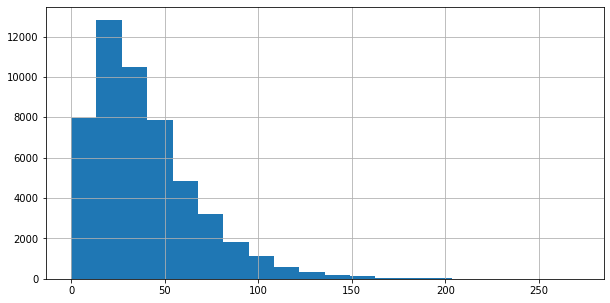

In [90]:
# Comportamiento de los datos
df['days_listed'].hist(bins=20, figsize=(10,5))

<AxesSubplot:>

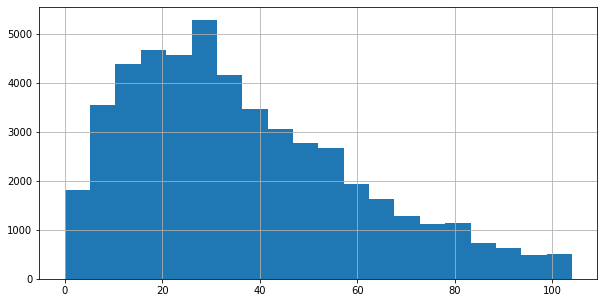

In [91]:
# Distribución de los datos dentro del rango normal
df_days_in = iqr_limit(df, 'days_listed')
df_days_in.hist(bins=20, figsize=(10,5))

In [92]:
df_days_in.describe()

count    49907.000000
mean        36.671930
std         23.184033
min          0.000000
25%         18.000000
50%         32.000000
75%         51.000000
max        104.000000
Name: days_listed, dtype: float64

**Viendo estos datos, podemos concluir que la mayoría de los anuncios consiguen la venta entre 9 a 55 días de haberse creado el anuncio. Hablando a grandes rasgos, podemos decir que un 80% de los autos se venderán en menos de 2 meses, en promedio 1 mes. El resto de los vehículos pueden tomar un mes más antes de venderse, llegando a tomar poco más de 3 meses.**

<AxesSubplot:>

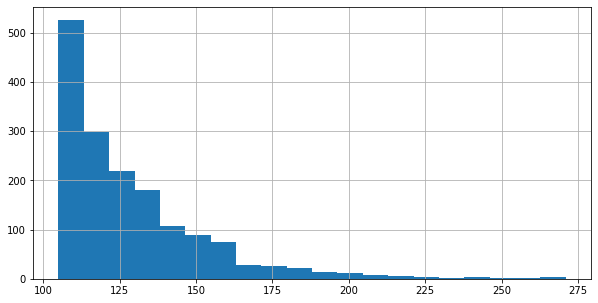

In [93]:
# Comportamiento de los datos fuera del rango normal
df_days_out = iqr_off_limit(df, 'days_listed')
df_days_out.hist(bins=20, figsize=(10,5))

In [94]:
df_days_out.describe()

count    1618.000000
mean      128.475278
std        24.287643
min       105.000000
25%       111.000000
50%       121.000000
75%       138.000000
max       271.000000
Name: days_listed, dtype: float64

**Tenemos un grupo de 1618 autos con un alto valor de días anunciado y todos se encuentran sobre los 100 días, esto es más de 3 meses. Se desconoce la razón para que un auto se demore un tiempo tan alto en venderse, esto podría deberse a diversos factores.**

## Precio promedio por cada tipo de vehículo

In [131]:
df.groupby('type')['model'].count()

type
SUV            12405
bus               24
convertible      446
coupe           2303
hatchback       1047
mini-van        1161
offroad          214
other            256
pickup          6988
sedan          12154
truck          12353
van              633
wagon           1541
Name: model, dtype: int64

**Los 3 tipos de vehículo que más se venden en el sitio son:**

- **SUV: 12405**
- **Truck: 12353**
- **Sedan: 12154**

In [96]:
# Precio promedio por tipo de auto
df.groupby('type').agg({'price': ['mean', 'median']})

price       
                     mean median
type                            
SUV          11149.400000   8900
bus          17135.666667  10500
convertible  14575.881166  12250
coupe        14353.442901  12950
hatchback     6868.513849   5980
mini-van      8193.177433   6495
offroad      14292.294393  11650
other        10989.714844   8995
pickup       16057.410418  14200
sedan         6965.358647   5995
truck        16734.894924  14995
van          10546.941548   7990
wagon         9088.134328   7900

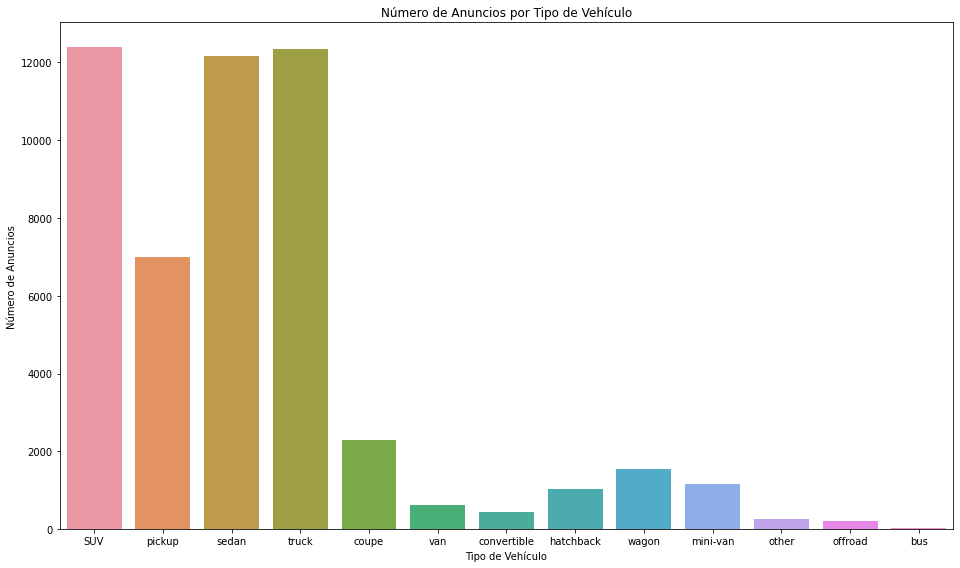

In [97]:
plt.figure(figsize=(26, 8))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='type')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Número de Anuncios')
plt.title('Número de Anuncios por Tipo de Vehículo')

plt.tight_layout()
plt.show()

**Podemos apreciar en el gráfico que la relación existente entre los vehículos y el número de anuncios es la popularidad que poseen, es decir, la cantidad de anuncios es proporcionalmente directo a la popularidad del vehículo. En este caso podemos destacar que los vehículos que más anuncios tienen son justamente los SUV'S, los Truck y los Sedan.**

- **Los buses son los menos comunes y también los más costosos, lo cual es comprensible.**
- **Los camiones se sitúan en el segundo lugar en términos de precio, pero también son bastante comunes en la página.**
- **Los autos sedan son los terceros más comunes, pero tienen un precio promedio relativamente bajo.**

## Factores de precio

In [98]:
df_suv = df[df['type']=='SUV']
df_truck = df[df['type']=='truck']
df_sedan = df[df['type']=='sedan']

print('SUV:',len(df_suv))
print('Truck:',len(df_truck))
print('Sedan:',len(df_sedan))

SUV: 12405
Truck: 12353
Sedan: 12154


**Ahora veamos como se comportan los datos en cada una de estas selecciones. Para poder visualizarlo, crearemos matrices de correlación para cada uno, seguido de diagramas de correlación para el precio y las columnas con un mayor indice de correlación. Dejamos la observación que en los diagramas de correlación, el eje y siempre representará el precio del vehículo.**

**Haremos este trabajo para los 3 tipos de vehículo más comunes y dividiremos su estudio entre los valores típicos y atípicos del precio.**

### SUV

**IN**

In [99]:
df_suv_in = df_suv[df_suv['price'].isin(df_price_in)]
len(df_suv_in)

12104

In [100]:
df_suv_in.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,condition_id,weekday,month,year,car_age,km_avg
price,1.000000,0.542642,-0.003016,-0.477675,0.108008,-0.021901,0.273043,0.011511,-0.006079,-0.000571,-0.541233,0.190912
model_year,0.542642,1.000000,-0.270503,-0.513439,-0.066609,-0.015059,0.308219,-0.003044,-0.013246,0.011475,-0.996332,0.469109
cylinders,-0.003016,-0.270503,1.000000,0.217256,0.123153,0.015449,-0.099449,-0.009213,0.002706,-0.004403,0.269400,-0.126443
odometer,-0.477675,-0.513439,0.217256,1.000000,0.033150,0.013661,-0.357139,0.007681,0.011436,-0.010091,0.511196,0.168249
is_4wd,0.108008,-0.066609,0.123153,0.033150,1.000000,-0.006375,-0.016720,0.014803,-0.001708,-0.005998,0.065917,-0.027508
days_listed,-0.021901,-0.015059,0.015449,0.013661,-0.006375,1.000000,-0.015353,-0.009822,-0.005119,-0.000485,0.014977,-0.011829
condition_id,0.273043,0.308219,-0.099449,-0.357139,-0.016720,-0.015353,1.000000,0.007806,0.003062,-0.002915,-0.307641,0.024997
weekday,0.011511,-0.003044,-0.009213,0.007681,0.014803,-0.009822,0.007806,1.000000,0.021082,-0.018722,0.001434,0.004883
month,-0.006079,-0.013246,0.002706,0.011436,-0.001708,-0.005119,0.003062,0.021082,1.000000,-0.817018,-0.056709,0.081406
year,-0.000571,0.011475,-0.004403,-0.010091,-0.005998,-0.000485,-0.002915,-0.018722,-0.817018,1.000000,0.074133,-0.106923


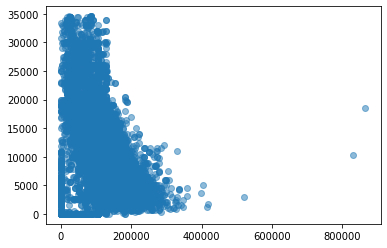

In [101]:
plt.scatter(x=df_suv_in['odometer'], y=df_suv_in['price'], alpha=0.5)

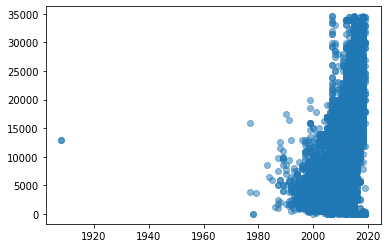

In [102]:
plt.scatter(x=df_suv_in['model_year'], y=df_suv_in['price'], alpha=0.5)

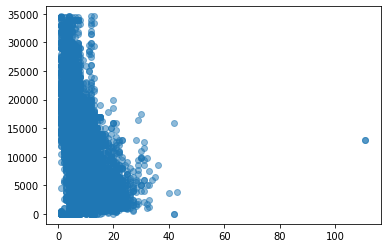

In [103]:
plt.scatter(x=df_suv_in['car_age'], y=df_suv_in['price'], alpha=0.5)

**La SUV muestra una fuerte correlación positiva con el año del modelo y una correlación negativa con el odómetro, lo que indica que los vehículos más nuevos y con menor kilometraje tienden a tener un precio más alto. La correlación más alta se encuentra con el año del modelo, con un valor de 0.55.**

**OUT**

In [104]:
df_suv_out = df_suv[df_suv['price'].isin(df_price_out)]
len(df_suv_out)

301

In [105]:
df_suv_out.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,condition_id,weekday,month,year,car_age,km_avg
price,1.000000,-0.070926,0.274858,-0.062358,0.134226,-0.038463,-0.129898,0.067923,-0.021016,0.027630,0.073707,-0.144452
model_year,-0.070926,1.000000,-0.053696,-0.485199,0.013910,-0.020873,0.131174,-0.067664,0.032664,-0.031603,-0.990828,0.279651
cylinders,0.274858,-0.053696,1.000000,0.134911,0.008534,0.018756,0.005366,0.083681,-0.000272,0.023713,0.056180,0.015969
odometer,-0.062358,-0.485199,0.134911,1.000000,-0.047014,0.048140,-0.263063,-0.041535,-0.028409,0.023272,0.481822,0.465989
is_4wd,0.134226,0.013910,0.008534,-0.047014,1.000000,0.058529,-0.166046,0.048916,0.080265,-0.082257,-0.024844,-0.021075
days_listed,-0.038463,-0.020873,0.018756,0.048140,0.058529,1.000000,-0.077245,0.009345,0.001285,-0.007726,0.019548,0.022764
condition_id,-0.129898,0.131174,0.005366,-0.263063,-0.166046,-0.077245,1.000000,0.074064,-0.059088,-0.005388,-0.130138,-0.166415
weekday,0.067923,-0.067664,0.083681,-0.041535,0.048916,0.009345,0.074064,1.000000,0.035229,0.045997,0.072973,-0.095312
month,-0.021016,0.032664,-0.000272,-0.028409,0.080265,0.001285,-0.059088,0.035229,1.000000,-0.828908,-0.144289,0.122411
year,0.027630,-0.031603,0.023713,0.023272,-0.082257,-0.007726,-0.005388,0.045997,-0.828908,1.000000,0.166373,-0.120486


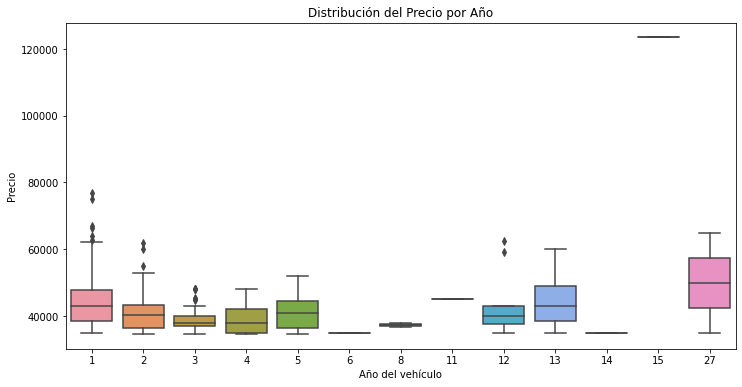

In [106]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_suv_out, x='car_age', y='price')
plt.xlabel('Año del vehículo')
plt.ylabel('Precio')
plt.title('Distribución del Precio por Año')
plt.show()

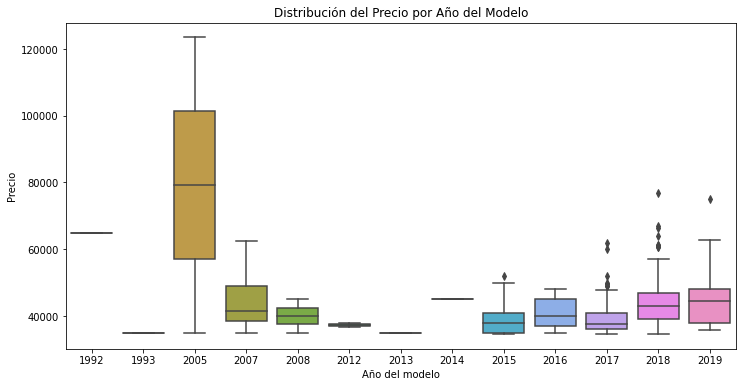

In [107]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_suv_out, x='model_year', y='price')
plt.xlabel('Año del modelo')
plt.ylabel('Precio')
plt.title('Distribución del Precio por Año del Modelo')
plt.show()

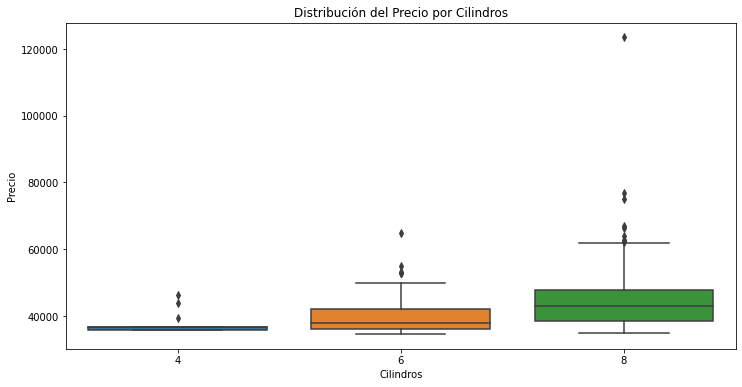

In [108]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_suv_out, x='cylinders', y='price')
plt.xlabel('Cilindros')
plt.ylabel('Precio')
plt.title('Distribución del Precio por Cilindros')
plt.show()

**En el caso de los SUV fuera del rango de precios normales, la correlación con el número de cilindros se vuelve más relevante, aunque sigue siendo baja (0.27), siendo la correlación más alta encontrada en este grupo.**

### Truck

**IN**

In [109]:
df_truck_in = df_truck[df_truck['price'].isin(df_price_in)]
len(df_truck_in)

11550

In [110]:
df_truck_in.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,condition_id,weekday,month,year,car_age,km_avg
price,1.000000,0.580680,0.009937,-0.409234,0.270586,0.009817,0.294696,-0.012573,-0.005529,0.003687,-0.578832,0.213329
model_year,0.580680,1.000000,-0.021177,-0.438973,0.136996,-0.009607,0.310125,-0.008234,-0.004665,0.006175,-0.996831,0.483275
cylinders,0.009937,-0.021177,1.000000,0.000972,0.153627,0.010575,-0.013965,-0.016871,-0.003150,0.007976,0.021755,-0.021675
odometer,-0.409234,-0.438973,0.000972,1.000000,-0.045936,0.001026,-0.300586,0.004200,-0.002551,0.004314,0.438141,0.230909
is_4wd,0.270586,0.136996,0.153627,-0.045936,1.000000,0.005022,0.093152,0.004911,-0.006249,0.005211,-0.136214,0.064874
days_listed,0.009817,-0.009607,0.010575,0.001026,0.005022,1.000000,0.006112,0.003296,-0.005243,0.004195,0.009915,-0.016322
condition_id,0.294696,0.310125,-0.013965,-0.300586,0.093152,0.006112,1.000000,0.000817,-0.008309,0.006033,-0.308815,0.043644
weekday,-0.012573,-0.008234,-0.016871,0.004200,0.004911,0.003296,0.000817,1.000000,0.014199,-0.014558,0.007053,-0.006675
month,-0.005529,-0.004665,-0.003150,-0.002551,-0.006249,-0.005243,-0.008309,0.014199,1.000000,-0.816910,-0.060333,0.080042
year,0.003687,0.006175,0.007976,0.004314,0.005211,0.004195,0.006033,-0.014558,-0.816910,1.000000,0.073391,-0.096211


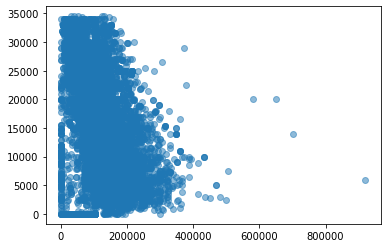

In [111]:
plt.scatter(x=df_truck_in['odometer'], y=df_truck_in['price'], alpha=0.5)

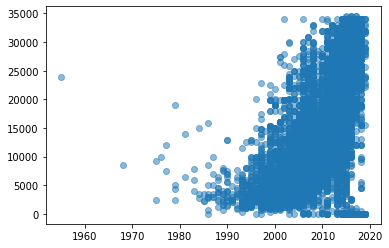

In [112]:
plt.scatter(x=df_truck_in['model_year'], y=df_truck_in['price'], alpha=0.5)

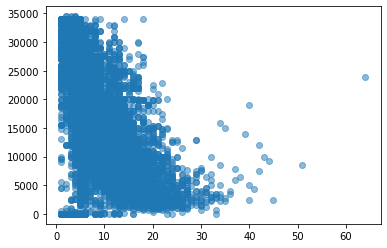

In [113]:
plt.scatter(x=df_truck_in['car_age'], y=df_truck_in['price'], alpha=0.5)

**En el caso de los camiones dentro del rango de precios normales, la correlación más significativa es con el año del modelo, seguida de la correlación con el odómetro. La correlación más alta con el precio se encuentra con el año del modelo (0.59).**

**OUT**

In [114]:
df_truck_out = df_truck[df_truck['price'].isin(df_price_out)]
len(df_truck_out)

803

In [115]:
df_truck_out.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,condition_id,weekday,month,year,car_age,km_avg
price,1.000000,-0.149006,-0.069215,0.114565,-0.318114,0.024667,-0.075511,-0.013272,-0.019488,0.018147,0.151377,-0.022799
model_year,-0.149006,1.000000,-0.003748,-0.314464,0.074869,-0.016075,0.202374,0.044122,-0.042143,0.057630,-0.986705,0.236963
cylinders,-0.069215,-0.003748,1.000000,-0.092273,0.163062,-0.084651,-0.052440,0.014554,0.016819,-0.014414,0.001387,-0.026289
odometer,0.114565,-0.314464,-0.092273,1.000000,-0.013491,-0.002550,-0.336587,-0.039980,0.047533,-0.005465,0.312344,0.557279
is_4wd,-0.318114,0.074869,0.163062,-0.013491,1.000000,-0.063873,0.058676,-0.024799,-0.002980,0.012923,-0.072472,0.066875
days_listed,0.024667,-0.016075,-0.084651,-0.002550,-0.063873,1.000000,-0.057784,0.014557,-0.005644,-0.007886,0.014728,-0.017326
condition_id,-0.075511,0.202374,-0.052440,-0.336587,0.058676,-0.057784,1.000000,0.041414,0.027505,-0.034399,-0.207182,-0.165854
weekday,-0.013272,0.044122,0.014554,-0.039980,-0.024799,0.014557,0.041414,1.000000,-0.018878,-0.007305,-0.045138,-0.030264
month,-0.019488,-0.042143,0.016819,0.047533,-0.002980,-0.005644,0.027505,-0.018878,1.000000,-0.812494,-0.090291,0.139865
year,0.018147,0.057630,-0.014414,-0.005465,0.012923,-0.007886,-0.034399,-0.007305,-0.812494,1.000000,0.105390,-0.132855


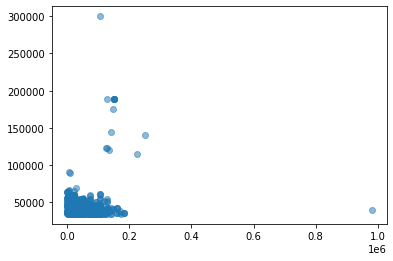

In [116]:
plt.scatter(x=df_truck_out['odometer'], y=df_truck_out['price'], alpha=0.5)

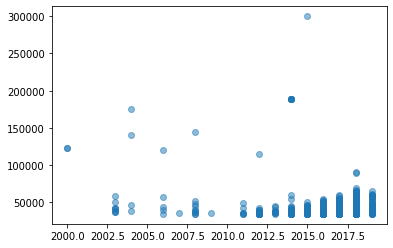

In [117]:
plt.scatter(x=df_truck_out['model_year'], y=df_truck_out['price'], alpha=0.5)

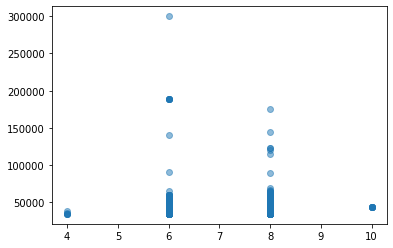

In [118]:
plt.scatter(x=df_truck_out['cylinders'], y=df_truck_out['price'], alpha=0.5)

**La correlación entre el precio y los cilindros de los camiones se mantiene similar en valor absoluto (0.27 a 0.31), pero con signos opuestos. Para los camiones fuera del rango de precios, la correlación es negativa (-0.31), mientras que para los camiones dentro del rango de precios normales es positiva (0.27). Esta correlación se vuelve la más significativa para los camiones con precios anormales.**

### Sedan

**IN**

In [119]:
df_sedan_in = df_sedan[df_sedan['price'].isin(df_price_in)]
len(df_sedan_in)

12147

In [120]:
df_sedan_in.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,condition_id,weekday,month,year,car_age,km_avg
price,1.000000,0.563242,-0.036687,-0.492956,0.041721,0.001330,0.298803,-0.005205,-0.017247,0.016052,-0.559912,0.197468
model_year,0.563242,1.000000,-0.147950,-0.483570,0.067530,-0.003444,0.289219,-0.000979,-0.016685,0.012192,-0.995613,0.430636
cylinders,-0.036687,-0.147950,1.000000,0.056746,0.218682,0.004517,-0.051552,-0.007918,-0.006167,0.000885,0.147552,-0.062441
odometer,-0.492956,-0.483570,0.056746,1.000000,-0.050997,0.002376,-0.344047,-0.000750,0.010917,-0.008078,0.481244,0.248302
is_4wd,0.041721,0.067530,0.218682,-0.050997,1.000000,0.005335,0.014877,-0.018117,0.006332,-0.002332,-0.067529,0.023545
days_listed,0.001330,-0.003444,0.004517,0.002376,0.005335,1.000000,-0.009933,0.012967,-0.008126,0.013101,0.004658,0.006147
condition_id,0.298803,0.289219,-0.051552,-0.344047,0.014877,-0.009933,1.000000,-0.005163,-0.009307,0.014219,-0.286950,0.024090
weekday,-0.005205,-0.000979,-0.007918,-0.000750,-0.018117,0.012967,-0.005163,1.000000,0.003677,-0.005757,0.000437,-0.000224
month,-0.017247,-0.016685,-0.006167,0.010917,0.006332,-0.008126,-0.009307,0.003677,1.000000,-0.818437,-0.059950,0.090515
year,0.016052,0.012192,0.000885,-0.008078,-0.002332,0.013101,0.014219,-0.005757,-0.818437,1.000000,0.081417,-0.111893


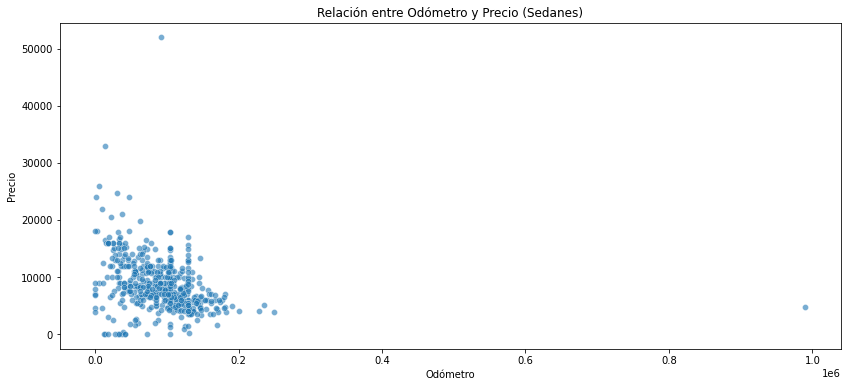

In [139]:
df_sedan_in = df_sedan_in[df_sedan_in['car_age'] < 10]
odometer_intervals = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000]
df_sedan_in['odometer_interval'] = pd.cut(df_sedan_in['odometer'], bins=odometer_intervals)
df_odometer_avg_price = df_sedan_in.groupby('odometer_interval')['price'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=df_odometer_avg_price, x='odometer_interval', y='price', palette='viridis')
plt.xlabel('Intervalo de Odómetro')
plt.ylabel('Precio Promedio')
plt.title('Precio Promedio por Intervalo de Odómetro (Sedanes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


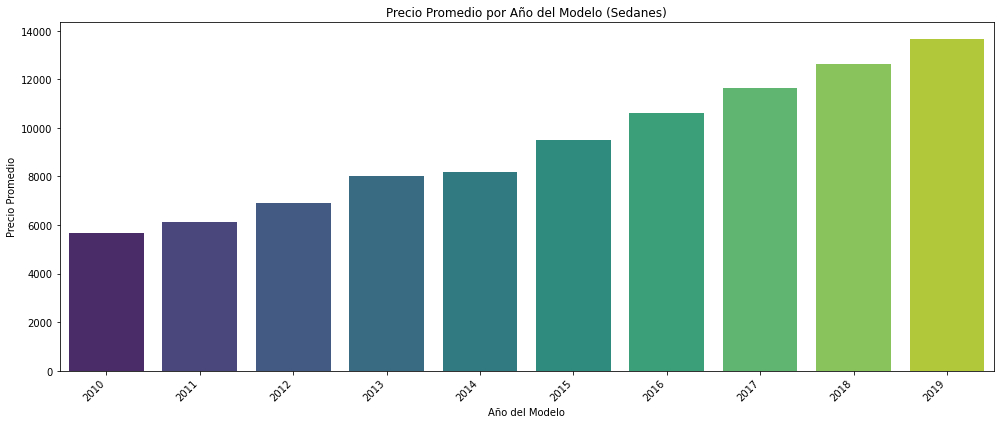

In [141]:
# Agrupar los datos por año del modelo y calcular el precio promedio para los sedanes
df_sedan_grouped = df_sedan_in.groupby('model_year')['price'].mean().reset_index()

# Gráfico de barras para mostrar el precio promedio por año del modelo (sedanes)
plt.figure(figsize=(14, 6))
sns.barplot(data=df_sedan_grouped, x='model_year', y='price', palette='viridis')
plt.xlabel('Año del Modelo')
plt.ylabel('Precio Promedio')
plt.title('Precio Promedio por Año del Modelo (Sedanes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

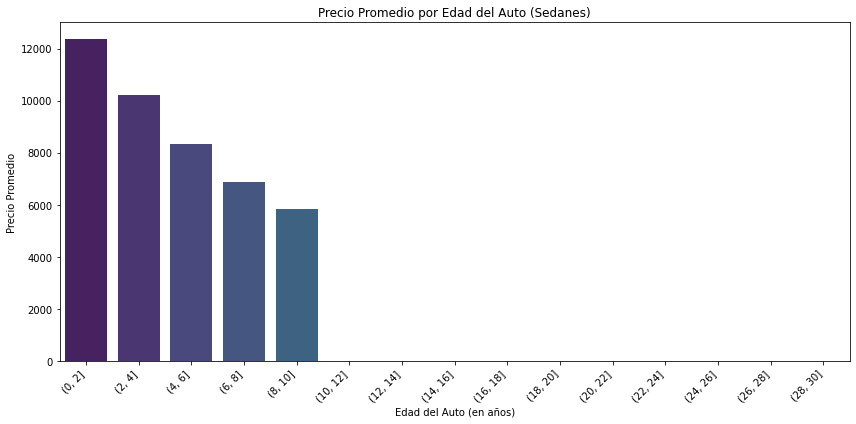

In [151]:
age_intervals = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
df_sedan_in['age_interval'] = pd.cut(df_sedan_in['car_age'], bins=age_intervals)
df_sedan_avg_price = df_sedan_in.groupby('age_interval')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_sedan_avg_price, x='age_interval', y='price', palette='viridis')
plt.xlabel('Edad del Auto (en años)')
plt.ylabel('Precio Promedio')
plt.title('Precio Promedio por Edad del Auto (Sedanes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**OUT**

In [124]:
df_sedan_out = df_sedan[df_sedan['price'].isin(df_price_out)]
len(df_sedan_out)

7

In [125]:
df_sedan_out.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,condition_id,weekday,month,year,car_age,km_avg
price,1.000000,-0.403517,-0.827229,0.251091,0.822420,-0.402637,-0.478029,0.079543,0.114172,-0.114788,0.403211,-0.385728
model_year,-0.403517,1.000000,-0.011736,-0.292493,-0.109091,0.584050,0.325096,-0.785689,-0.103705,0.251515,-0.999844,0.307145
cylinders,-0.827229,-0.011736,1.000000,-0.345464,-0.645497,0.084425,0.650000,0.333443,-0.369409,0.258199,0.016504,0.225442
odometer,0.251091,-0.292493,-0.345464,1.000000,-0.002085,-0.670812,-0.860509,0.478183,0.264713,-0.512945,0.284424,0.604353
is_4wd,0.822420,-0.109091,-0.645497,-0.002085,1.000000,-0.168938,-0.193649,-0.099340,0.038152,-0.166667,0.106531,-0.218316
days_listed,-0.402637,0.584050,0.084425,-0.670812,-0.168938,1.000000,0.372525,-0.816918,0.355224,-0.035422,-0.587288,-0.340521
condition_id,-0.478029,0.325096,0.650000,-0.860509,-0.193649,0.372525,1.000000,-0.205196,-0.627995,0.710047,-0.313571,-0.238328
weekday,0.079543,-0.785689,0.333443,0.478183,-0.099340,-0.816918,-0.205196,1.000000,-0.162972,-0.099340,0.787360,0.247547
month,0.114172,-0.103705,-0.369409,0.264713,0.038152,0.355224,-0.627995,-0.162972,1.000000,-0.763048,0.090230,-0.086153
year,-0.114788,0.251515,0.258199,-0.512945,-0.166667,-0.035422,0.710047,-0.099340,-0.763048,1.000000,-0.234369,-0.249657


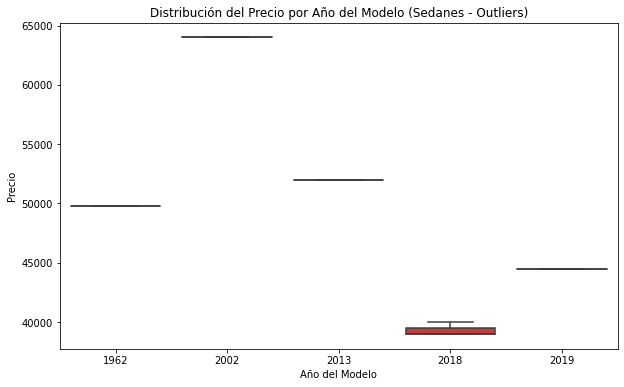

In [126]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sedan_out, x='model_year', y='price')
plt.xlabel('Año del Modelo')
plt.ylabel('Precio')
plt.title('Distribución del Precio por Año del Modelo (Sedanes - Outliers)')
plt.show()

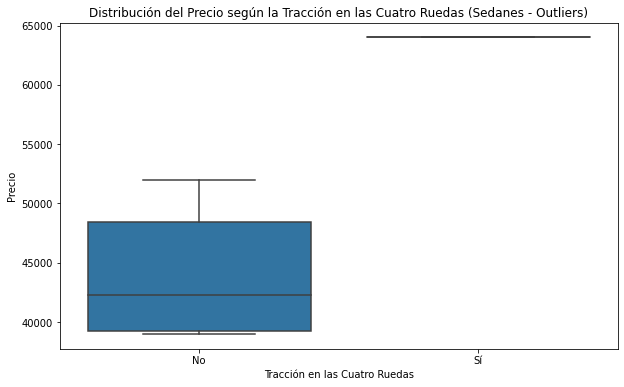

In [127]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sedan_out, x='is_4wd', y='price')
plt.xlabel('Tracción en las Cuatro Ruedas')
plt.ylabel('Precio')
plt.title('Distribución del Precio según la Tracción en las Cuatro Ruedas (Sedanes - Outliers)')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

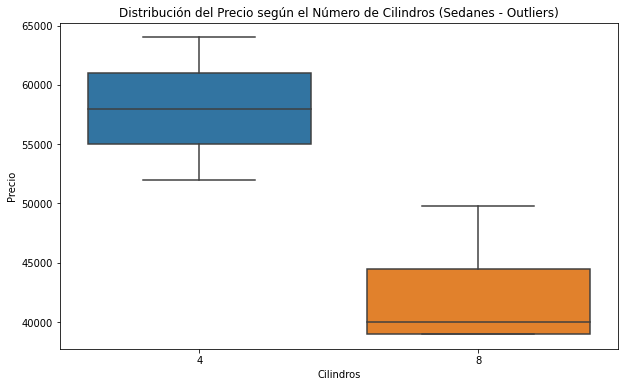

In [128]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sedan_out, x='cylinders', y='price')
plt.xlabel('Cilindros')
plt.ylabel('Precio')
plt.title('Distribución del Precio según el Número de Cilindros (Sedanes - Outliers)')
plt.show()

**En este caso, se observa una alta correlación entre la tracción del vehículo (0.82) y el número de cilindros (-0.83), ambos valores con una magnitud superior a 0.8. Estas correlaciones son las más altas encontradas en los análisis anteriores.**

**En el análisis de los tres tipos de vehículos más comunes, se identificaron tres categorías principales que influyen en el precio de manera consistente. Estas categorías son:**

- **Model_year (año del modelo): Se observó una relación positiva entre el año del modelo y el precio del vehículo. A medida que el año del modelo aumenta, el precio tiende a ser mayor.**

- **Odometer (kilometraje): Se encontró una relación negativa entre el kilometraje y el precio del vehículo. A medida que el kilometraje aumenta, el precio tiende a disminuir.**

- **Car_age (edad del vehículo): Se observó una relación negativa entre la edad del vehículo y su precio. A medida que el vehículo se vuelve más antiguo, su precio tiende a disminuir.**

- **Estas correlaciones se mantienen relativamente constantes en los tres tipos de vehículos analizados, con valores cercanos a 0.5. Además, se identificaron rangos normales para cada una de las variables analizadas:**

- **Price (precio): El rango normal de precios se encuentra entre 1 y 35,000, con una mayor densidad de vehículos en el rango de 4,000 a 9,000. Por encima de este rango normal, los precios aumentan gradualmente hasta llegar a 70,000 y luego experimentan un aumento rápido hasta un máximo de 375,000.**

- **Odometer (kilometraje): El rango normal de kilometraje está entre 0 y 251,000, con una mayor concentración de vehículos en el rango de 100,000 a 130,000 kilómetros. Por encima de este rango normal, el kilometraje aumenta gradualmente hasta alcanzar los 400,000 kilómetros y luego experimenta un aumento rápido hasta un máximo de 990,000 kilómetros.**

- **Car_age (edad del vehículo): La edad normal de los vehículos vendidos se encuentra entre 0 y 24 años, con una mayor concentración de vehículos en el rango de 4 a 12 años. Fuera de este rango normal, se observan tres rangos adicionales con diferentes patrones de comportamiento. El primero aumenta lentamente entre 25 y 35 años, el segundo aumenta más rápidamente hasta los 55 años, y el último rango muestra el aumento más rápido y llega hasta los 110 años.**

- **Cylinders (número de cilindros): El 98% de los vehículos tienen 4, 6 u 8 cilindros, mientras que una minoría presenta 10, 5, 3 o 12 cilindros. Es interesante destacar que para los camiones, la correlación de esta variable se invierte cuando se consideran los camiones dentro del rango de precios normales o anormales. Para los camiones dentro del rango normal de precios, la correlación es de 0.27, mientras que para los camiones fuera de este rango, la correlación es de -0.31. Esto podría estar relacionado con los diferentes tipos y modelos de motores utilizados en los camiones.**

- **Condition (estado del vehículo): Las condiciones más comunes para los vehículos son "Excellent" (48%), "Good" (39%) y "Like new" (9%). Estas tres categorías abarcan el 96% de los datos totales, mientras que el resto de los vehículos se encuentran principalmente en condiciones nuevas o como nuevas, con una pequeña minoría en estado de salvamento.**

**Caso especial:**

- **Sedan (automóviles sedán): Cuando se analizan los automóviles sedán fuera del rango de precios normales, se observa una anomalía. En este rango de precios, se encontraron correlaciones más altas que en otros casos. Se identificó una correlación de 0.82 con la tracción (is_4wd) y una correlación de -0.83 con el número de cilindros (cylinders) en los sedanes.**